In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data = data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [5]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [7]:
# Add Constants
X_in =  sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [8]:
model1 = sm.OLS(y_in,X_in).fit()

# 4.) Recreate the graph fro your model

In [9]:
import matplotlib.pyplot as plt

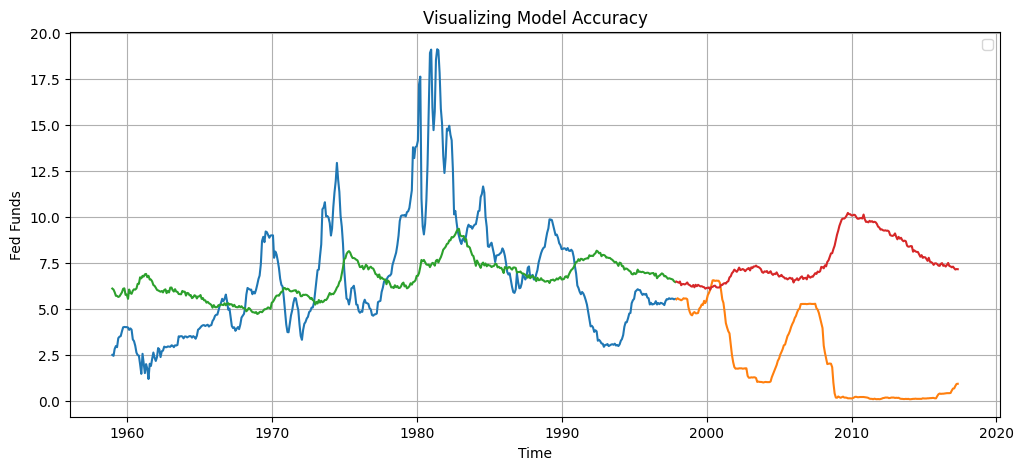

In [10]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [13]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.07142201316864
Outsample MSE :  40.360827835668445


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
max_degrees = 3


DEGREE:  1


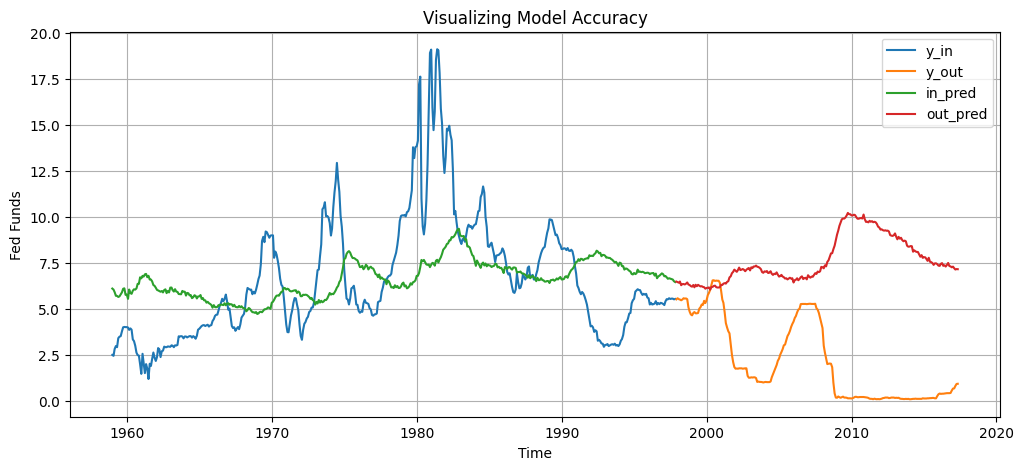

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566698
DEGREE:  2


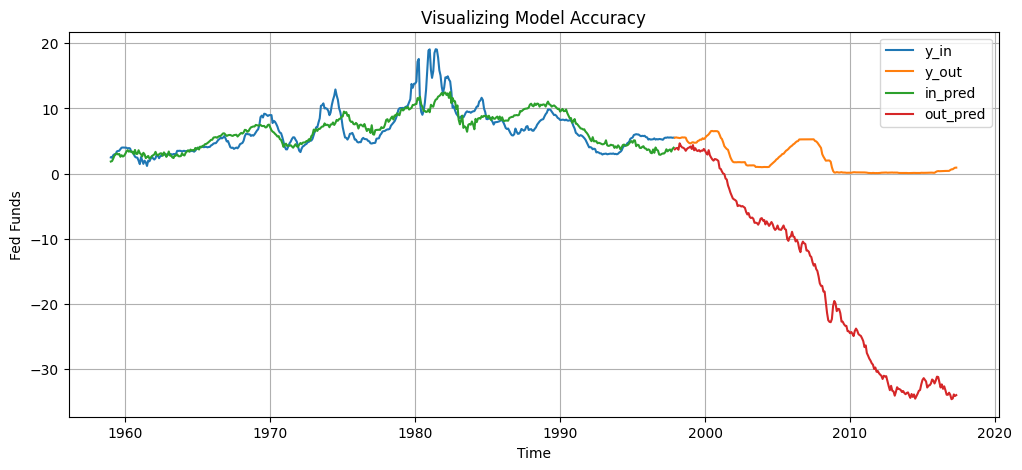

Insample MSE :  3.863477139276067
Outsample MSE :  481.446509903632
DEGREE:  3


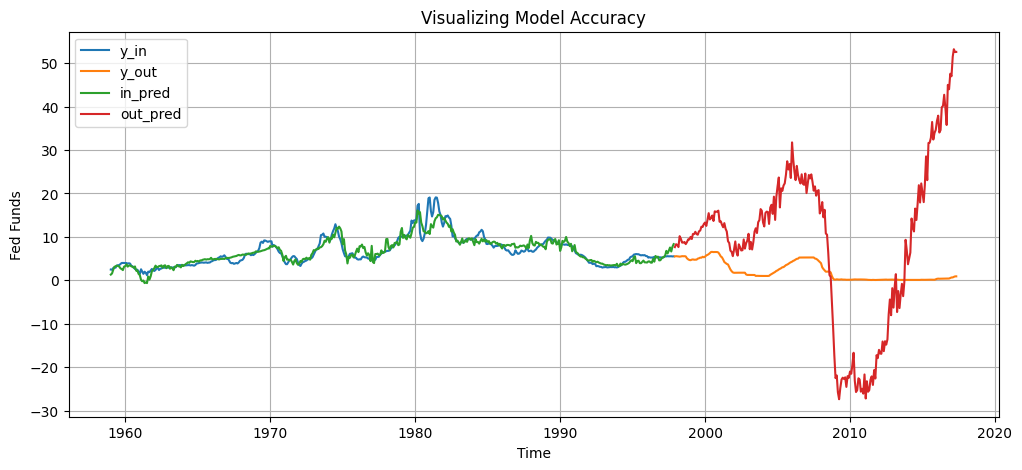

Insample MSE :  1.8723636271946136
Outsample MSE :  371.76618900618945


In [23]:
for degrees in range(1,max_degrees+1):
    print("DEGREE: ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))

    ###
    plt.plot(y_in,label ="y_in")
    plt.plot(y_out,label ="y_out")
    
    in_pred = model1.predict(X_in_poly)
    out_pred = model1.predict(X_out_poly)
    in_pred = pd.DataFrame(in_pred,index = y_in.index)
    out_pred = pd.DataFrame(out_pred,index = y_out.index)
    plt.plot(in_pred,label ="in_pred")
    plt.plot(out_pred,label ="out_pred")
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly),y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly),y_out)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

In [17]:
dir(poly)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_combinations',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_max_degree',
 '_min_degree',
 '_more_tags',
 '_n_out_full',
 '_num_combinations',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'degree',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_metadata_routing',
 'get_params'

# 7.) State your observations :

###  From three plots, we know that the difference between Insample MSE and Outsample MSE is so large in degree 2 and degree 3 but for degree 1, it seems so normal. So we choose degree 1 as our ideal model.